### Optimal number of clusters: Silhouette

- Dataset: BaskinRobbins dataset
- Learning Date: 18-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

In [51]:
# import liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [52]:
# load BaskinRobins dataset to a dataframe
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbins.csv'
df = pd.read_csv(url)
df.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


### Scikit-learn: KMeans Clustering

1. Scale data
2. Optimal number of clusters
    - A. Silhouette analysis
        - a. visualize silhouette
    - B. Elbow method
3. Compute and name clusters

In [54]:
# import libraries

from sklearn import preprocessing
from sklearn.cluster import KMeans

#### 1. Scale data

In [55]:
df.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,Bananas Foster,160,8.0,0.2,20,16,2.0
1,Baseball Nut,160,9.0,0.2,19,13,3.0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0


In [56]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [57]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [58]:
len(cols)

6

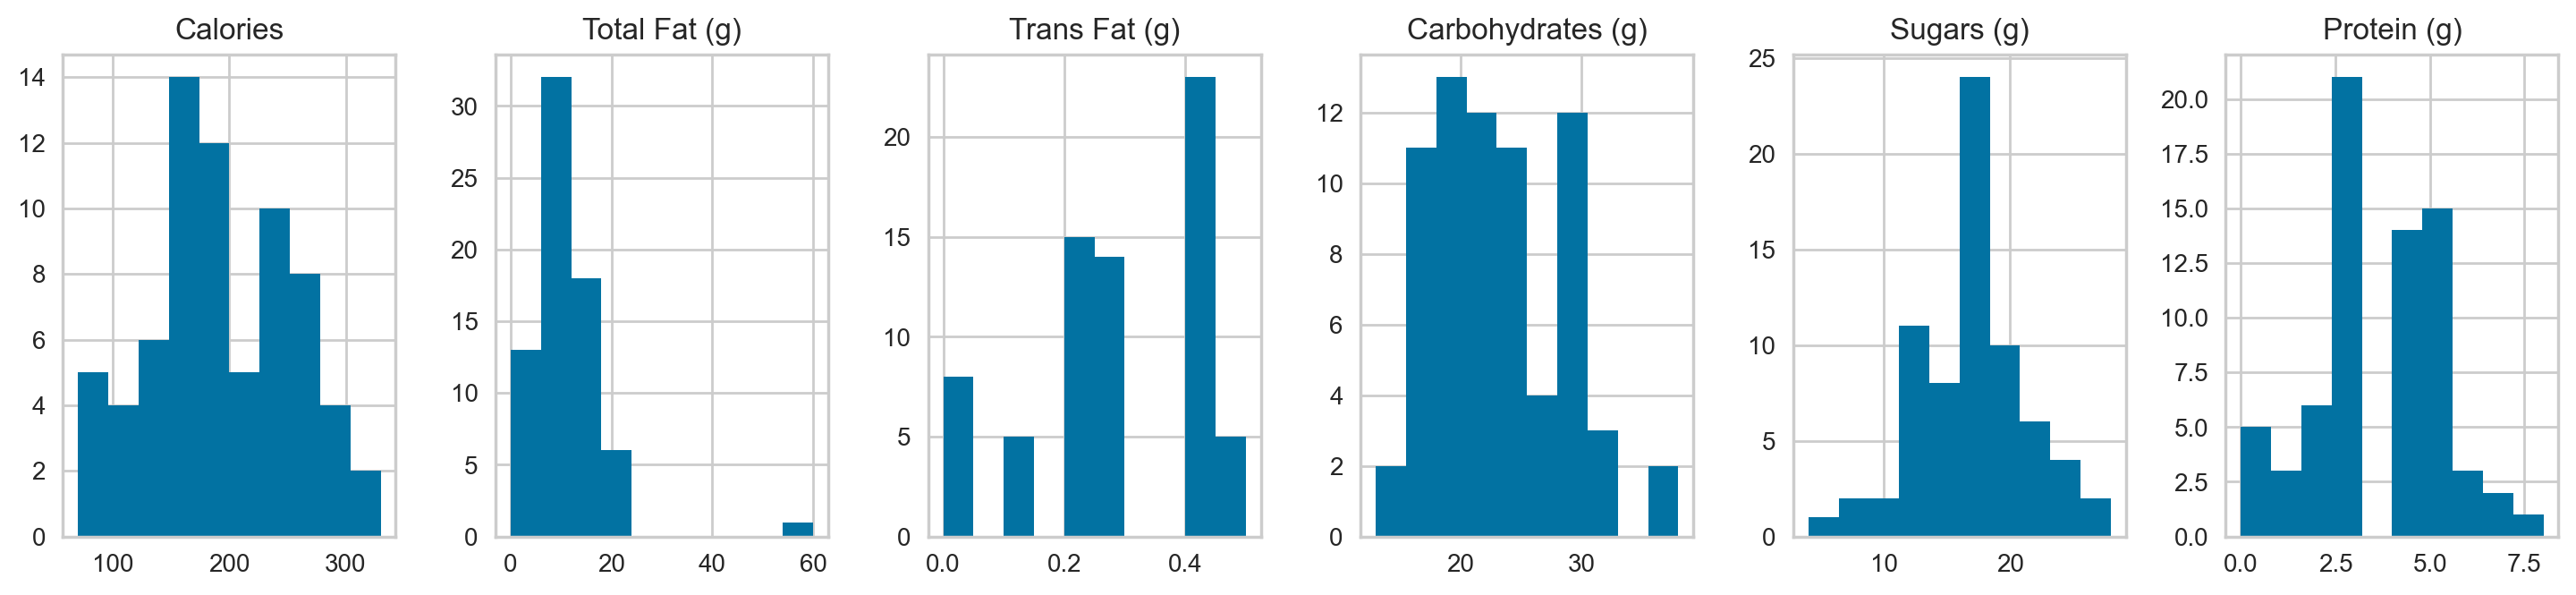

In [59]:
df[cols].hist(layout = (1, len(cols)), figsize = (3*len(cols), 3.5));

In [60]:
## z-score
# scaler = preprocessing.StandardScaler() # create StandardScaler instance

# power transform
scaler = preprocessing.PowerTransformer(standardize = True)

scaler

PowerTransformer()

In [61]:
S = scaler.fit_transform(df[cols]) # transform data
S

array([[-0.49981634, -0.19140601, -0.64396146, -0.4474016 , -0.21905077,
        -0.94318149],
       [-0.49981634, -0.03972367, -0.64396146, -0.67227346, -0.88364416,
        -0.34646195],
       [-0.33434815, -0.03972367,  0.04605887, -0.23526106, -0.44209212,
        -0.34646195],
       [-1.17571347, -0.91999515, -1.22273763, -1.16630974, -0.21905077,
        -0.34646195],
       [-1.00440936, -1.41701632, -1.22273763,  0.67289162,  0.6864766 ,
        -0.94318149],
       [-0.66658198, -0.19140601,  0.04605887, -0.91133724, -0.66365259,
        -0.34646195],
       [-1.17571347, -0.71378638, -1.22273763, -0.23526106, -2.76920248,
        -0.34646195],
       [-0.33434815, -0.19140601, -0.64396146, -0.23526106,  0.00539329,
        -0.34646195],
       [ 0.15507549, -0.19140601, -0.64396146,  2.20293228, -2.16379808,
         0.85959791],
       [ 0.47619563,  0.23993775,  0.85765627,  0.67289162,  0.45821689,
         0.25476122],
       [-0.00697326,  0.23993775, -0.64396146, -0.

In [62]:
S[:5]

array([[-0.49981634, -0.19140601, -0.64396146, -0.4474016 , -0.21905077,
        -0.94318149],
       [-0.49981634, -0.03972367, -0.64396146, -0.67227346, -0.88364416,
        -0.34646195],
       [-0.33434815, -0.03972367,  0.04605887, -0.23526106, -0.44209212,
        -0.34646195],
       [-1.17571347, -0.91999515, -1.22273763, -1.16630974, -0.21905077,
        -0.34646195],
       [-1.00440936, -1.41701632, -1.22273763,  0.67289162,  0.6864766 ,
        -0.94318149]])

In [63]:
S[:5].round(4) # 2D numpy array

array([[-0.4998, -0.1914, -0.644 , -0.4474, -0.2191, -0.9432],
       [-0.4998, -0.0397, -0.644 , -0.6723, -0.8836, -0.3465],
       [-0.3343, -0.0397,  0.0461, -0.2353, -0.4421, -0.3465],
       [-1.1757, -0.92  , -1.2227, -1.1663, -0.2191, -0.3465],
       [-1.0044, -1.417 , -1.2227,  0.6729,  0.6865, -0.9432]])

In [64]:
# get X and y data from S numpy array to a dataframe

X = pd.DataFrame(S, columns = cols) # z-score
X.head(3)

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462


In [65]:
X.shape

(70, 6)

array([[<AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'Total Fat (g)'}>,
        <AxesSubplot: title={'center': 'Trans Fat (g)'}>,
        <AxesSubplot: title={'center': 'Carbohydrates (g)'}>,
        <AxesSubplot: title={'center': 'Sugars (g)'}>,
        <AxesSubplot: title={'center': 'Protein (g)'}>]], dtype=object)

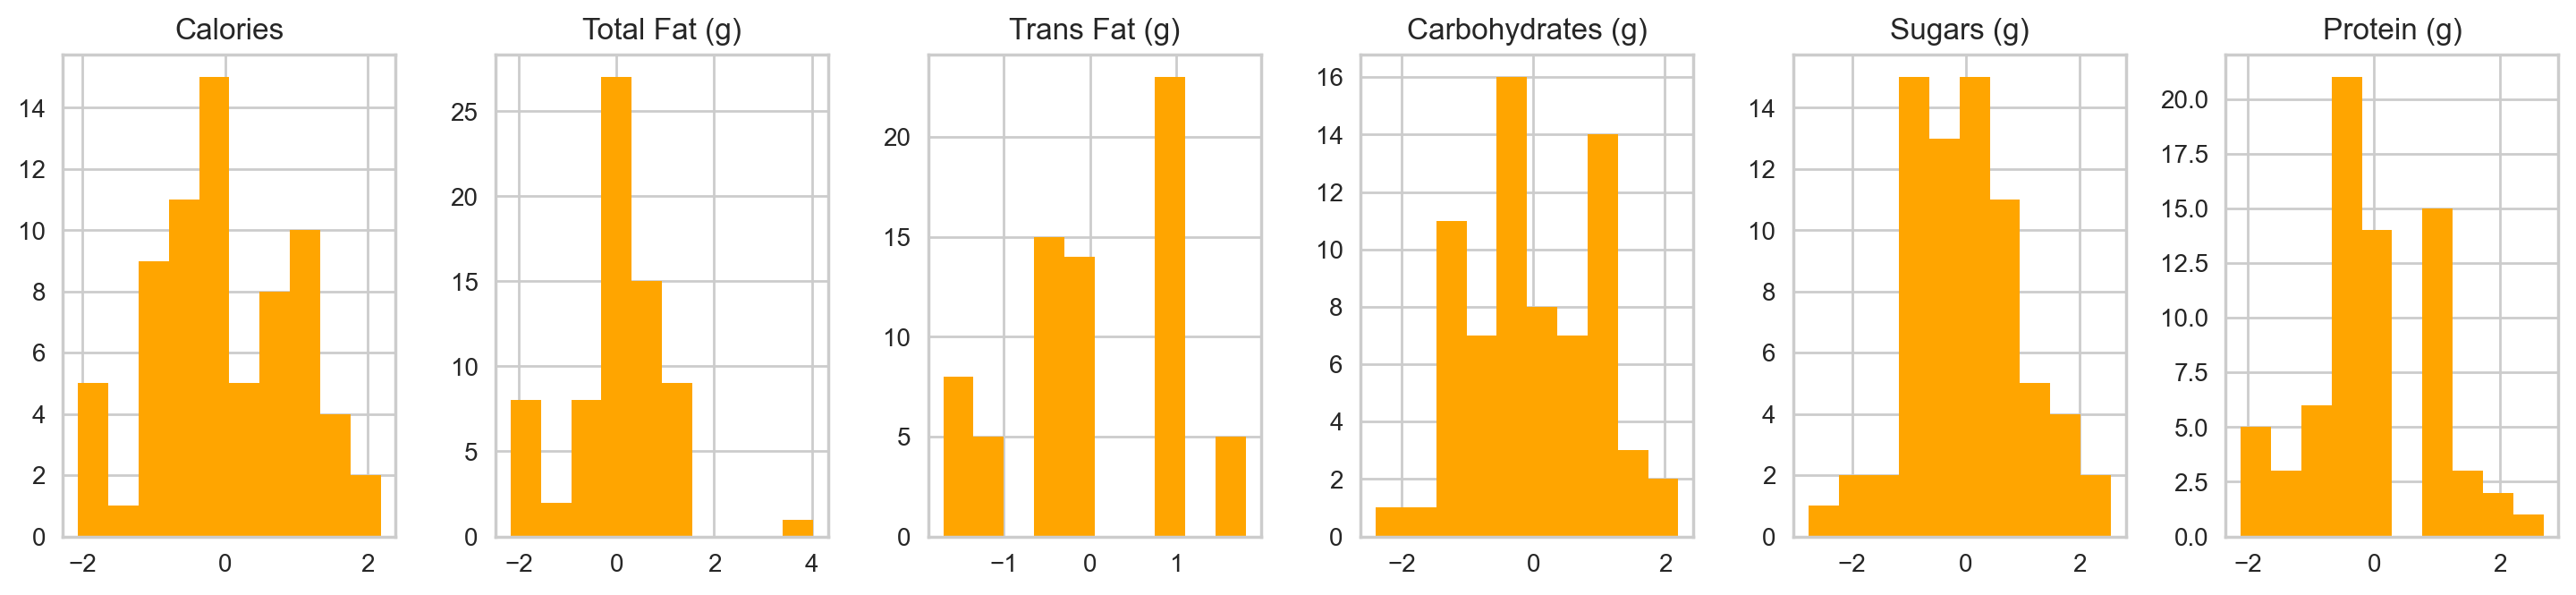

In [66]:
X[cols].hist(layout = (1, len(cols)), figsize = (3*len(cols), 3.5), color = 'orange')

#### 2. Silhouette Analysis

In [67]:
# import libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

In [68]:
# a function to get scores

def sil_score(X, from_k = 2, to_k = 6):

    ''' 
    calculate silhouette score for k clusters
    '''

    sils = []

    for k in range(from_k, to_k + 1):
        m = KMeans(n_clusters = k)
        m.fit(X)

        # the silhouette_score gives the average value for all the samples
        silhouette_avg = silhouette_score(X, m.labels_).round(4)
        sils.append([silhouette_avg, k])

#         Compute the silhouette scores for each sample
#         sample_silhouette_values = silhouette_samples(X, m.labels_)
#         print(sample_silhouette_values)
#     return max(sils)[1]

    return sils

In [69]:
ss = sil_score(X, 2, 5)
ss

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

[[0.44, 2], [0.4279, 3], [0.3824, 4], [0.4043, 5]]

In [70]:
print(f'scores = {ss}')
print(f'optimal number of clusters = {max(ss)[1]}')

scores = [[0.44, 2], [0.4279, 3], [0.3824, 4], [0.4043, 5]]
optimal number of clusters = 2


#### Visualize silhouette

In [71]:
# instantiate the clustering model and visualizer

model = KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

SilhouetteVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=3))

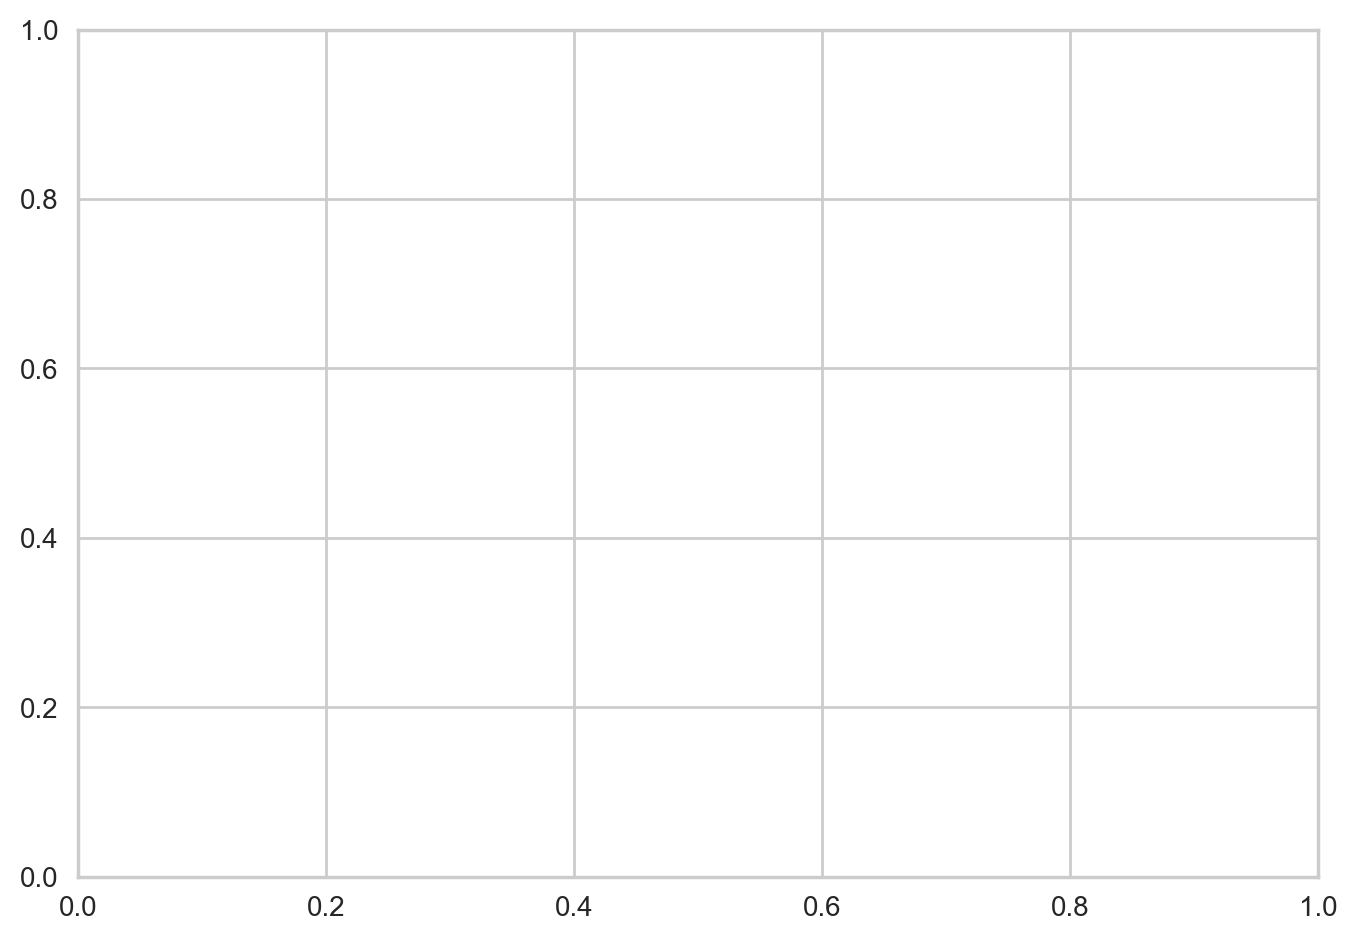

In [72]:
visualizer = SilhouetteVisualizer(model)
visualizer

In [73]:
visualizer.fit(X)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=3))

In [74]:
visualizer.poof()

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 70 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


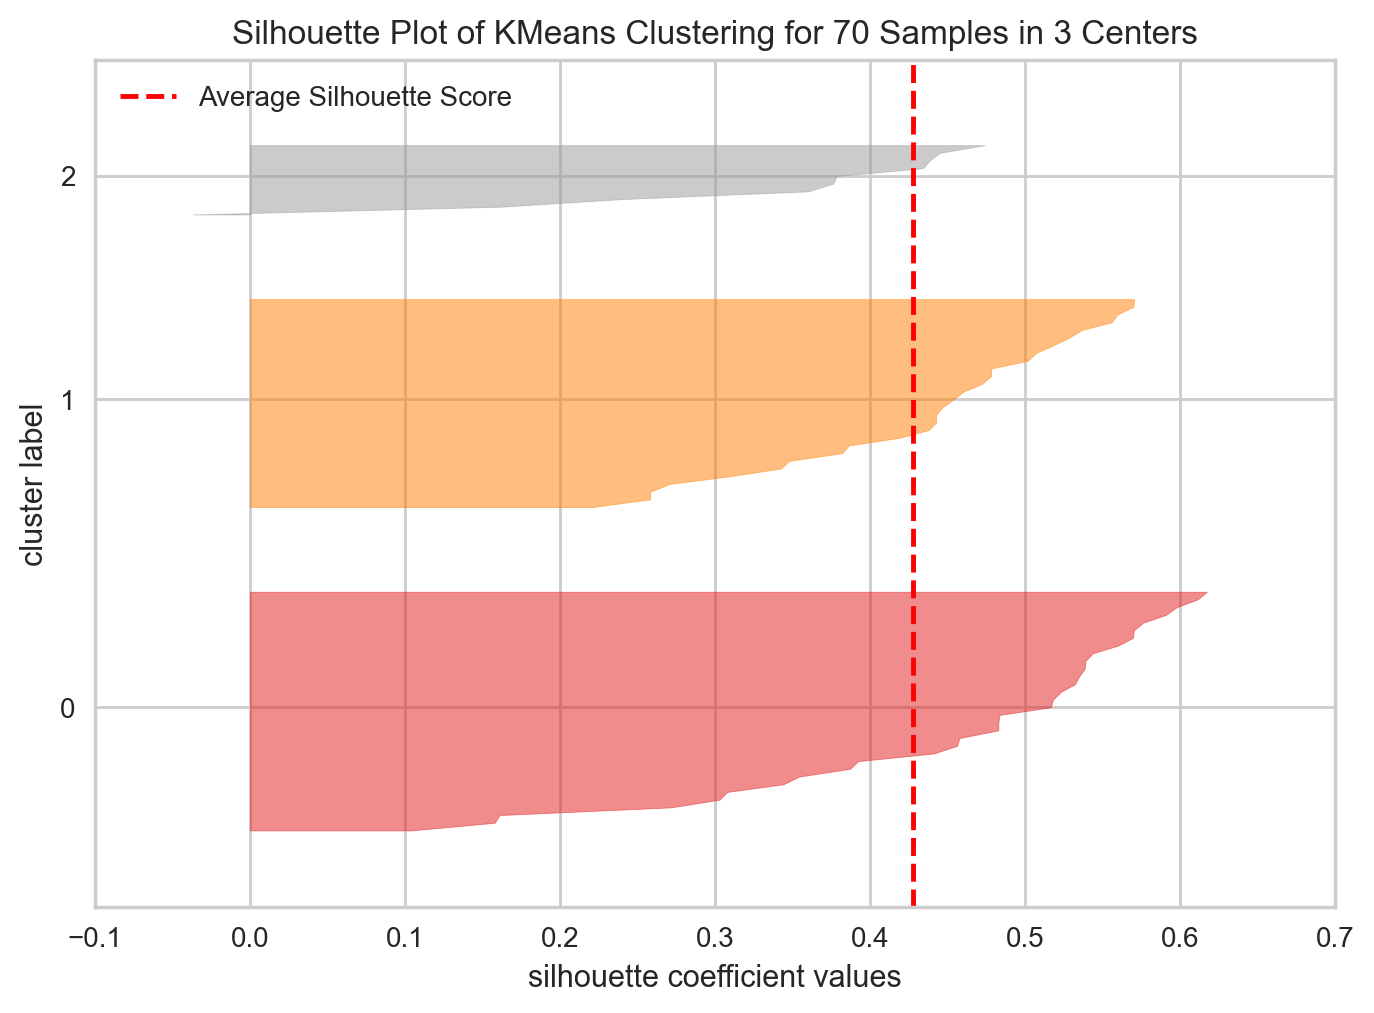

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 70 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
# instantiate the clustering model and visualizer

model = KMeans(n_clusters = 3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X) # fit the training data to the visualizer
visualizer.poof() # draw/show/poof the data

In [76]:
visualizer.silhouette_score_

0.4278960672517726

In [77]:
# a function to plot

def silhouette_plot(X, from_k, to_k):

    sil_scores=[]

    for k in range(from_k, to_k + 1):

        # Instantiate the clustering model and visualizer
        m = KMeans(n_clusters=k)
        visualizer = SilhouetteVisualizer(m)
        visualizer.fit(X) # Fit the training data to the visualizer
        visualizer.poof() # Draw/show/poof the data
#         print(visualizer.silhouette_score_)
#         sil_scores.append([k, visualizer.silhouette_score_])
        sil_scores.append([visualizer.silhouette_score_, k])
        
    return sil_scores

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


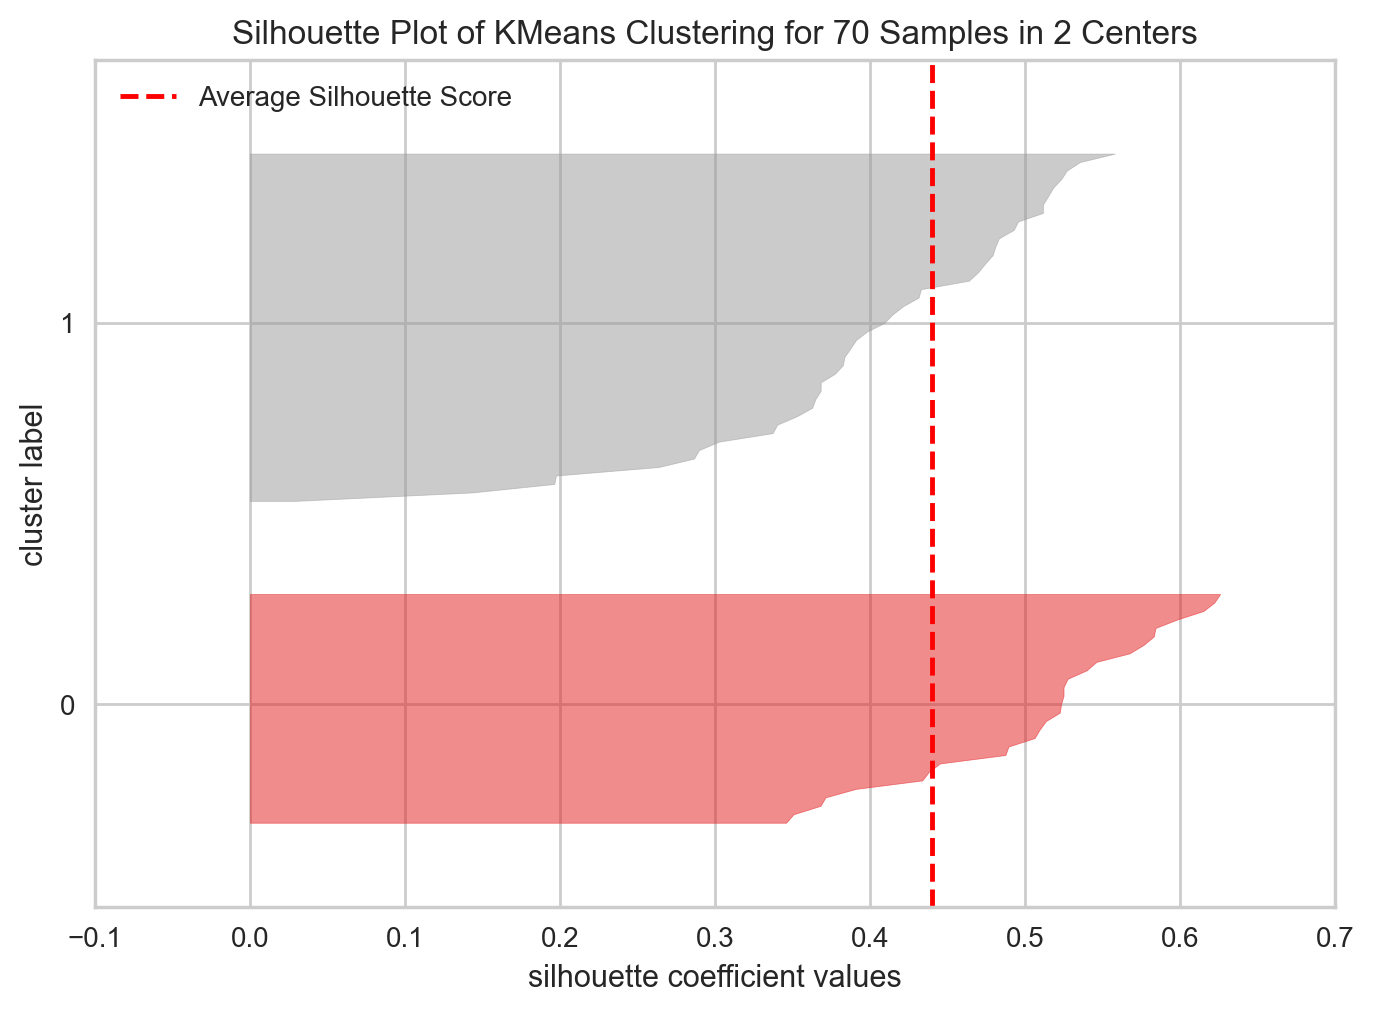

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


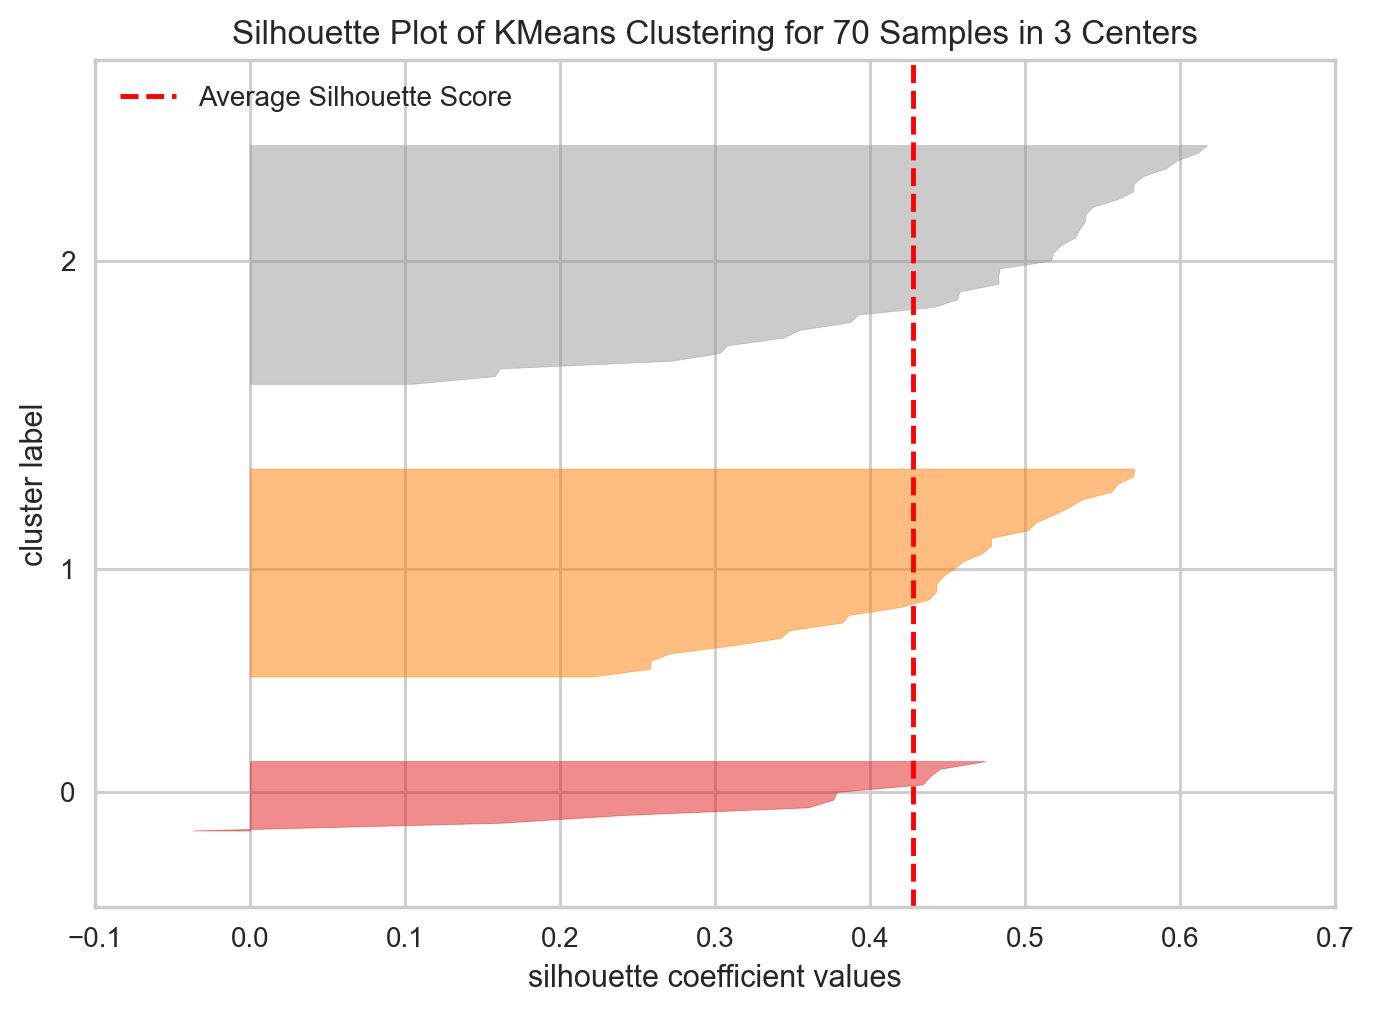

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


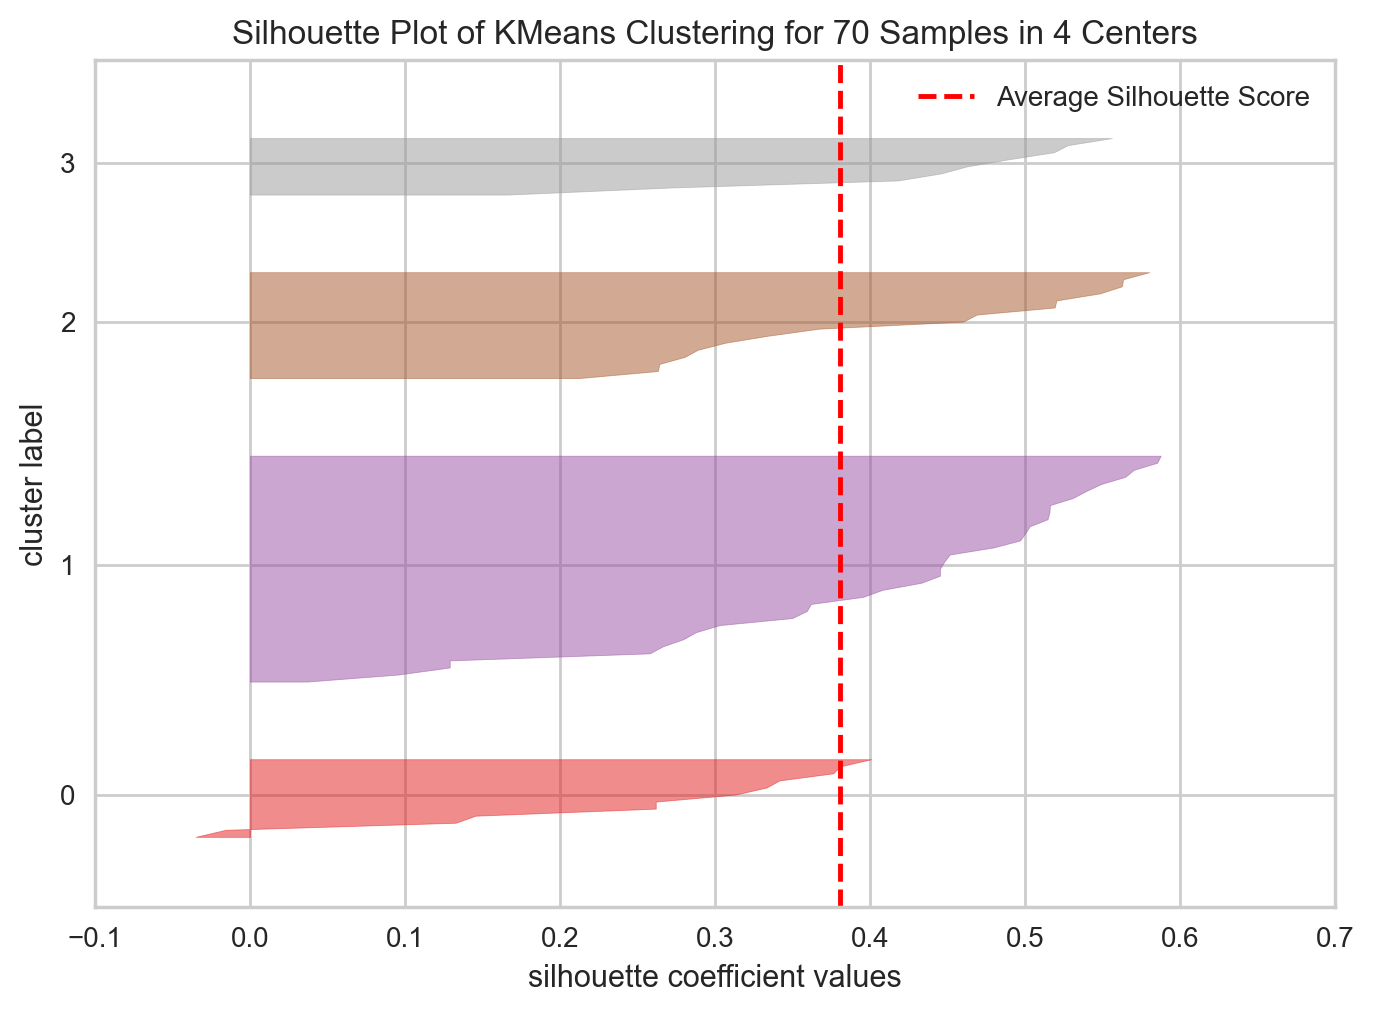

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


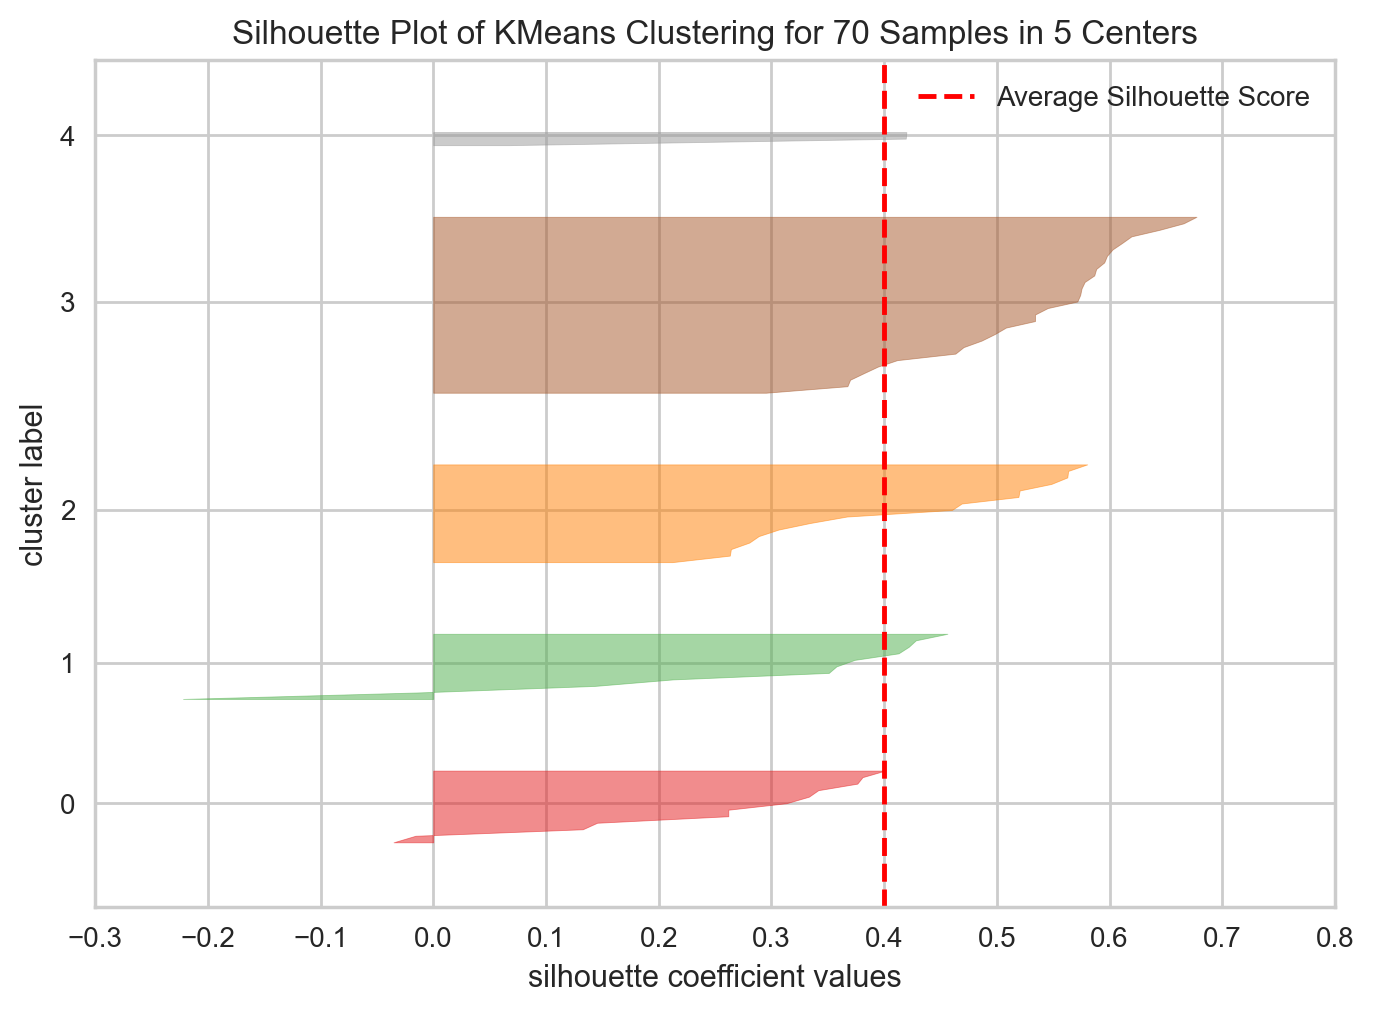

In [78]:
scores = silhouette_plot(X, 2, 5)

In [79]:
print(scores)

[[0.4399726559028324, 2], [0.4278960672517726, 3], [0.3803362831380045, 4], [0.4000959872138135, 5]]


In [80]:
max(scores)

[0.4399726559028324, 2]

In [81]:
max(scores)[1]

2

#### Elbow method

In [82]:
def elbow_plot(X, from_k = 2, to_k = 5):

    '''
    plot elbow chart to help determining optimal number of clusters
    '''
   
    ssd = []

    for k in range(from_k, to_k + 1):
        m=KMeans(n_clusters = k)
        m.fit(X)
        ssd.append([k, m.inertia_])
    dd = pd.DataFrame(ssd, columns = ['k', 'ssd'])
    dd['pct_chg'] = dd['ssd'].pct_change() * 100

    plt.plot(dd['k'], dd['ssd'], linestyle = '--', marker = 'o')
    # plt.plot(xy[:, 0], xy[:, 1], '--o')
    
    for index, row in dd.iterrows():
        plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize = 12)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

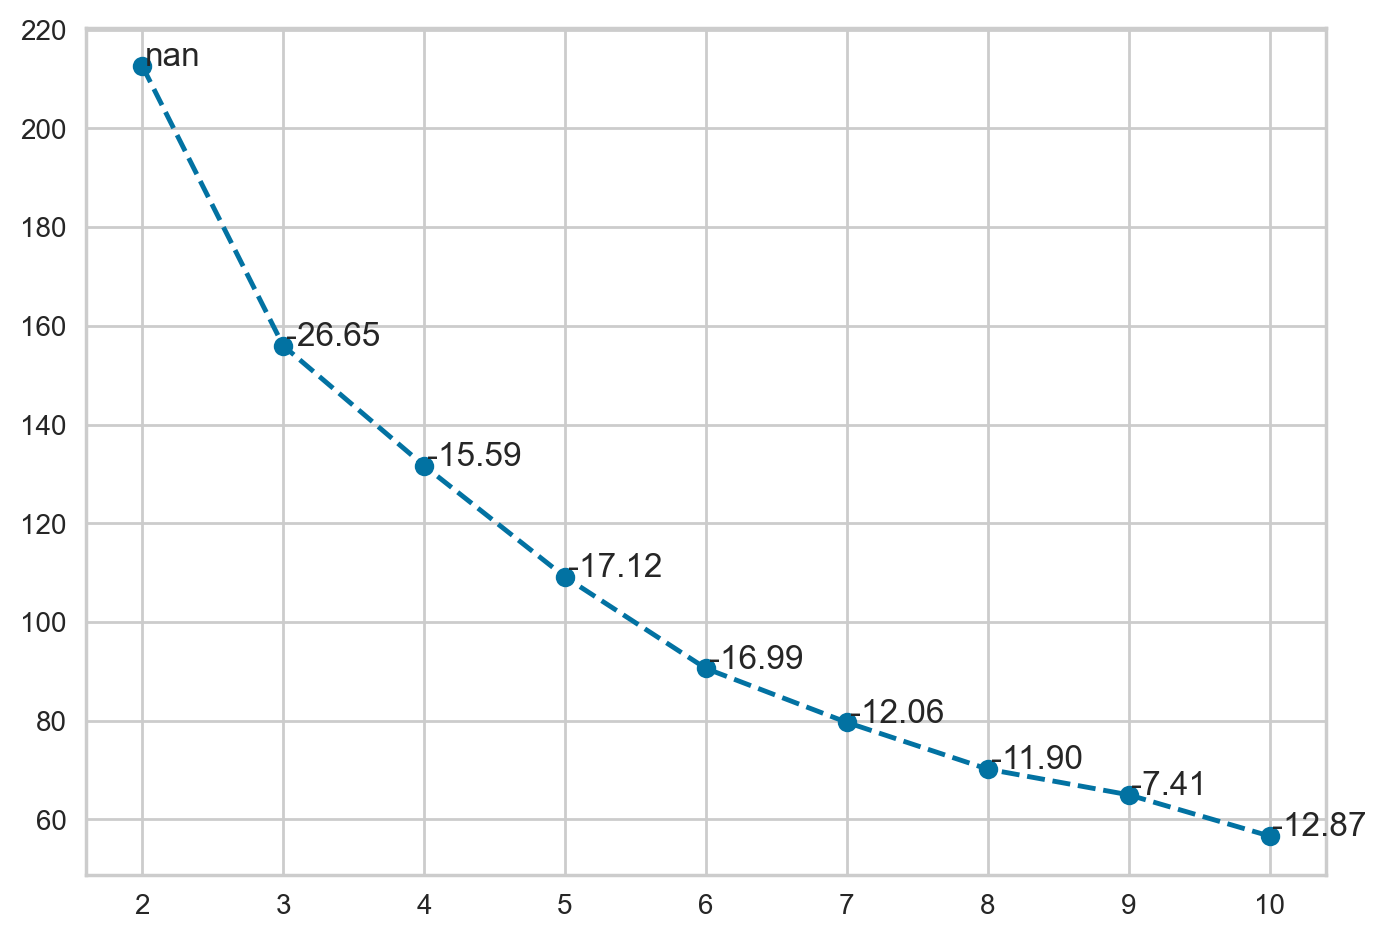

In [83]:
elbow_plot(X, 2, 10)

#### 3. Compute and name clusters

In [84]:
model = KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

In [85]:
model.fit(X)

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [86]:
model.cluster_centers_.round(4)

array([[-1.5485, -1.8342, -1.605 , -0.33  , -0.2096, -1.425 ],
       [ 1.0208,  0.7778,  0.9435,  0.7589,  0.7909,  0.8394],
       [-0.4093, -0.1074, -0.324 , -0.5609, -0.6265, -0.2892]])

In [87]:
model.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1], dtype=int32)

In [88]:
# add a new column to store cluster number

df['cluster'] = model.labels_
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,2
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0


<AxesSubplot: xlabel='cluster', ylabel='count'>

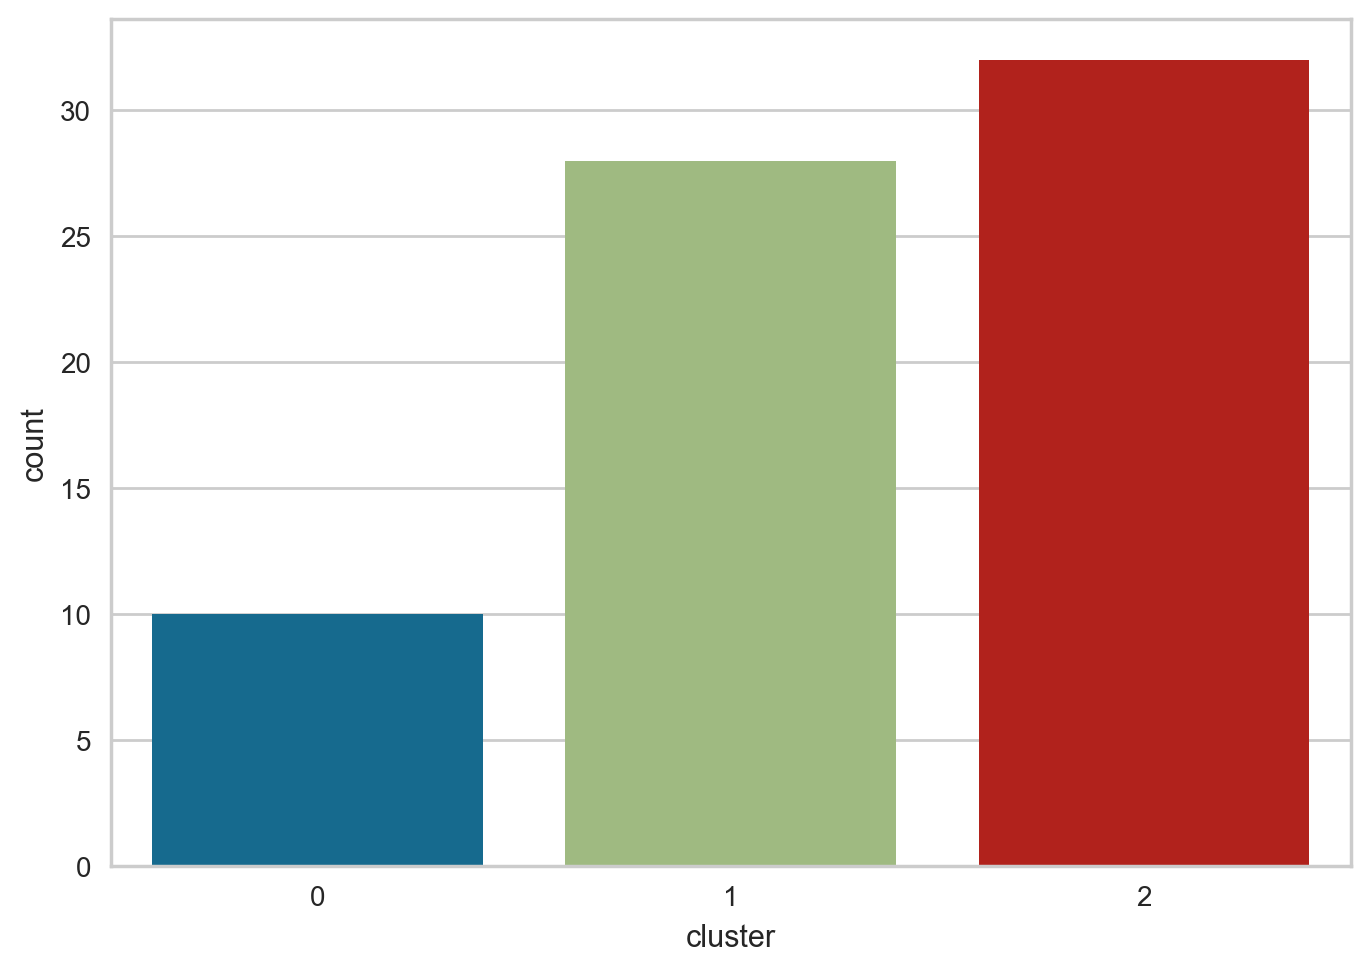

In [89]:
# plot

sns.countplot(x = 'cluster', data = df)

In [90]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)'] 
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

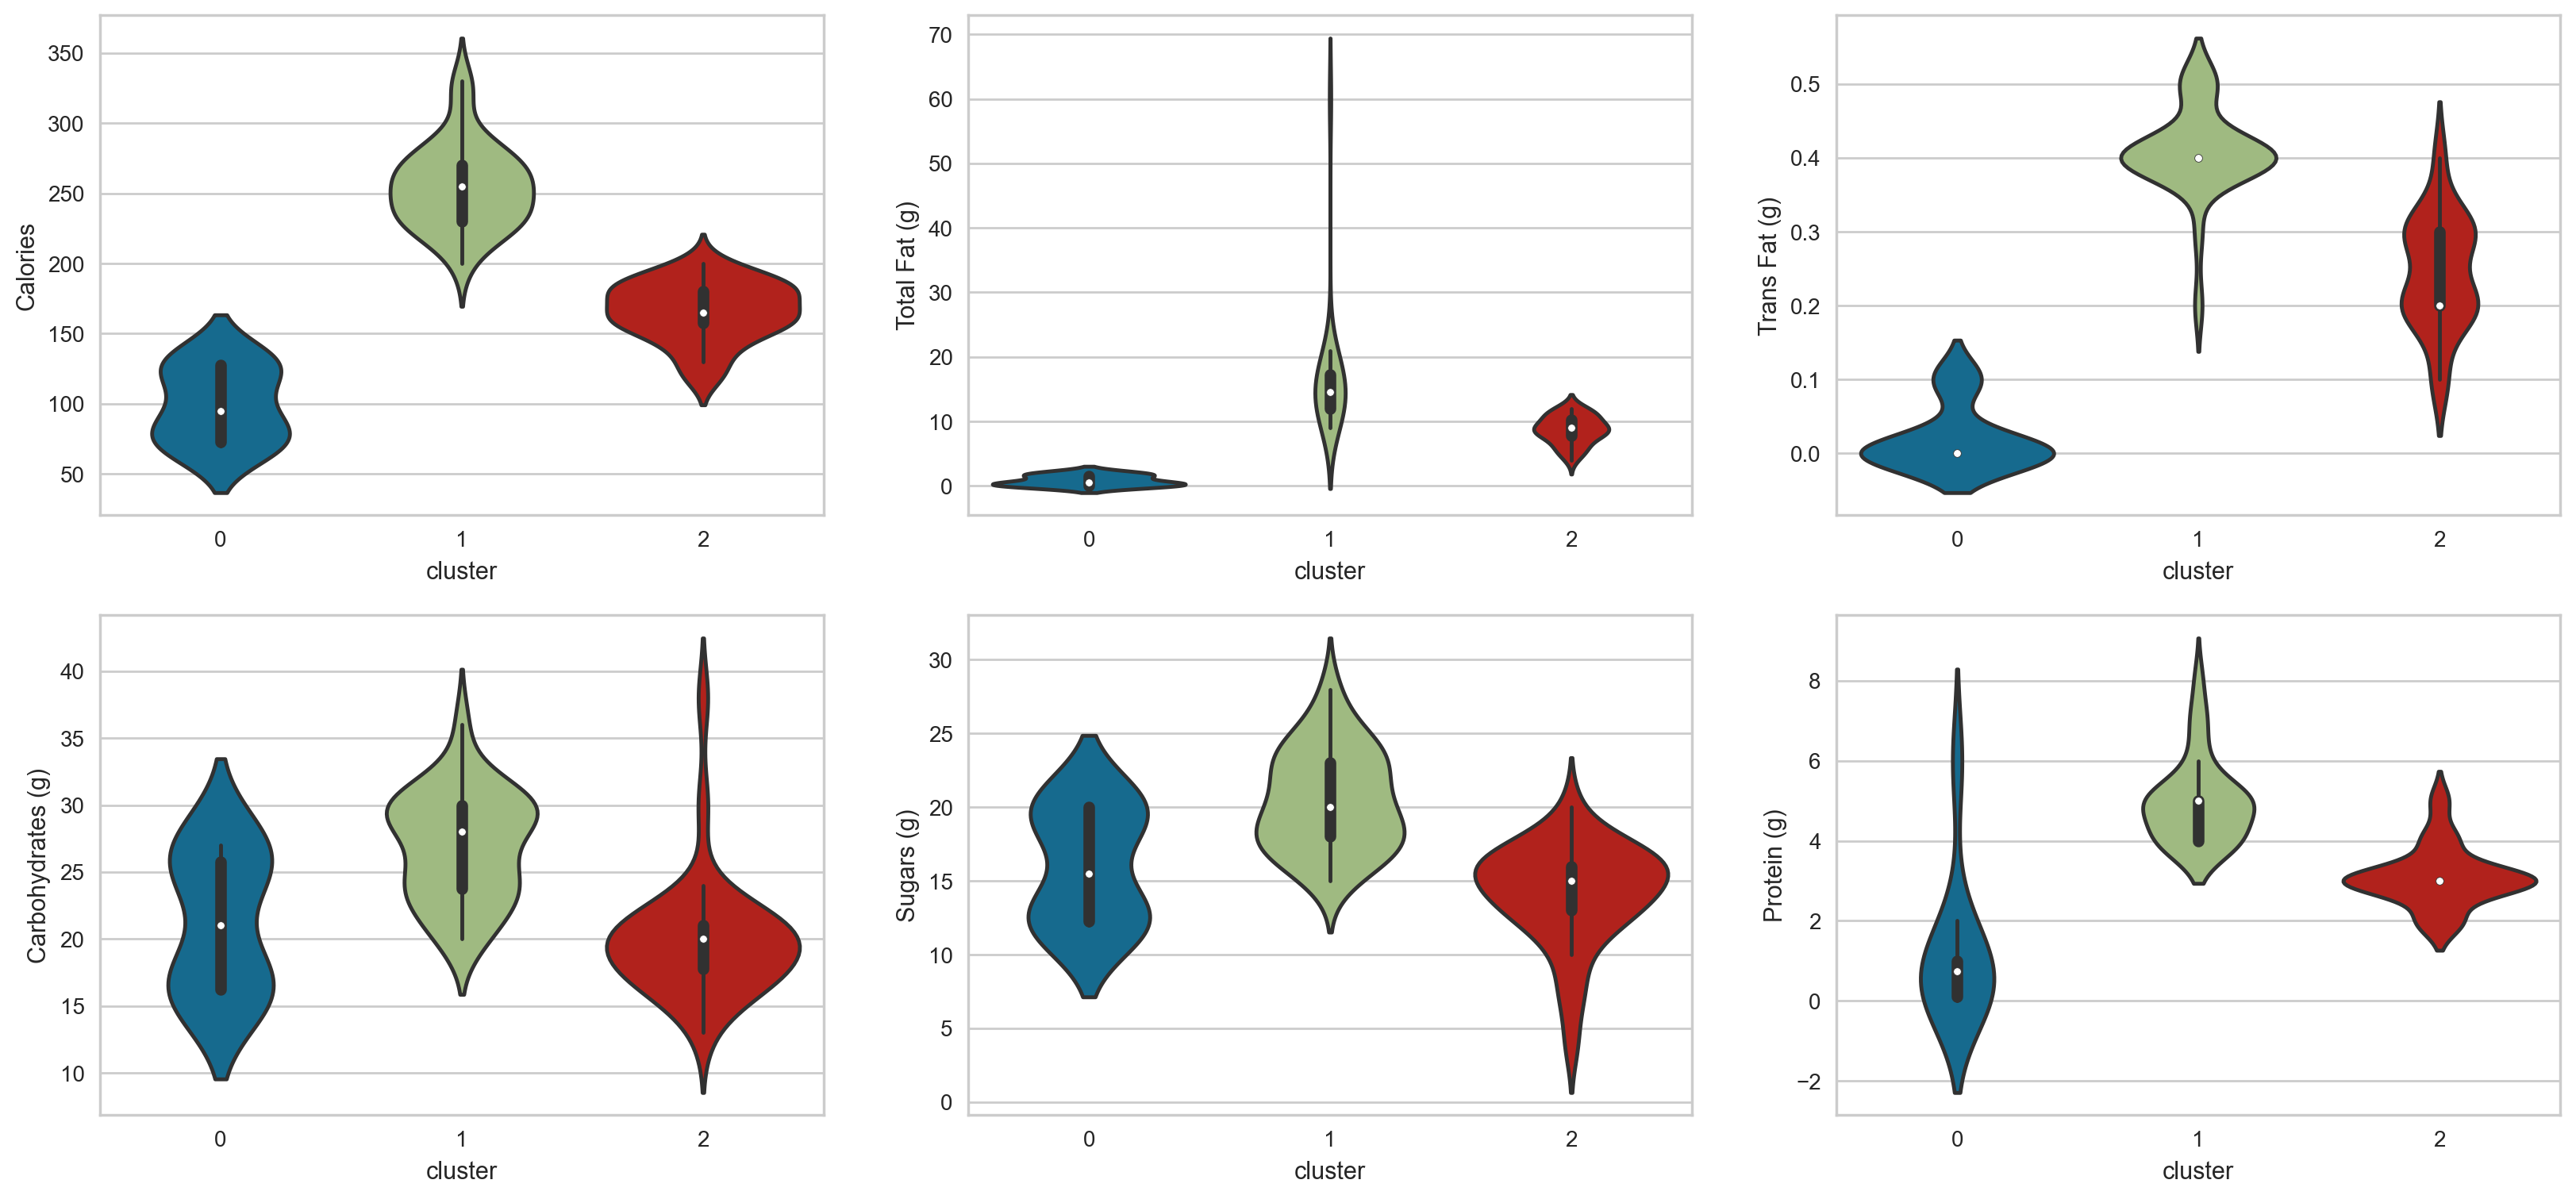

In [91]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 9))

ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x = 'cluster', y = col, data = df, ax = ax[i])

#### Scale data (either z-score, power transform)

In [92]:
dx = X
dx.head(3)

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462


In [93]:
dx['cluster'] = model.labels_
dx.head(3)

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,-0.499816,-0.191406,-0.643961,-0.447402,-0.219051,-0.943181,2
1,-0.499816,-0.039724,-0.643961,-0.672273,-0.883644,-0.346462,2
2,-0.334348,-0.039724,0.046059,-0.235261,-0.442092,-0.346462,2


In [94]:
dx.groupby('cluster').median()

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
cluster,,,,,,
0,-1.612508,-1.935544,-1.700508,-0.328836,-0.326237,-1.680032
1,1.029516,0.671798,0.857656,0.980131,0.686477,0.859598
2,-0.417082,-0.039724,-0.643961,-0.447402,-0.442092,-0.346462


In [95]:
dx.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

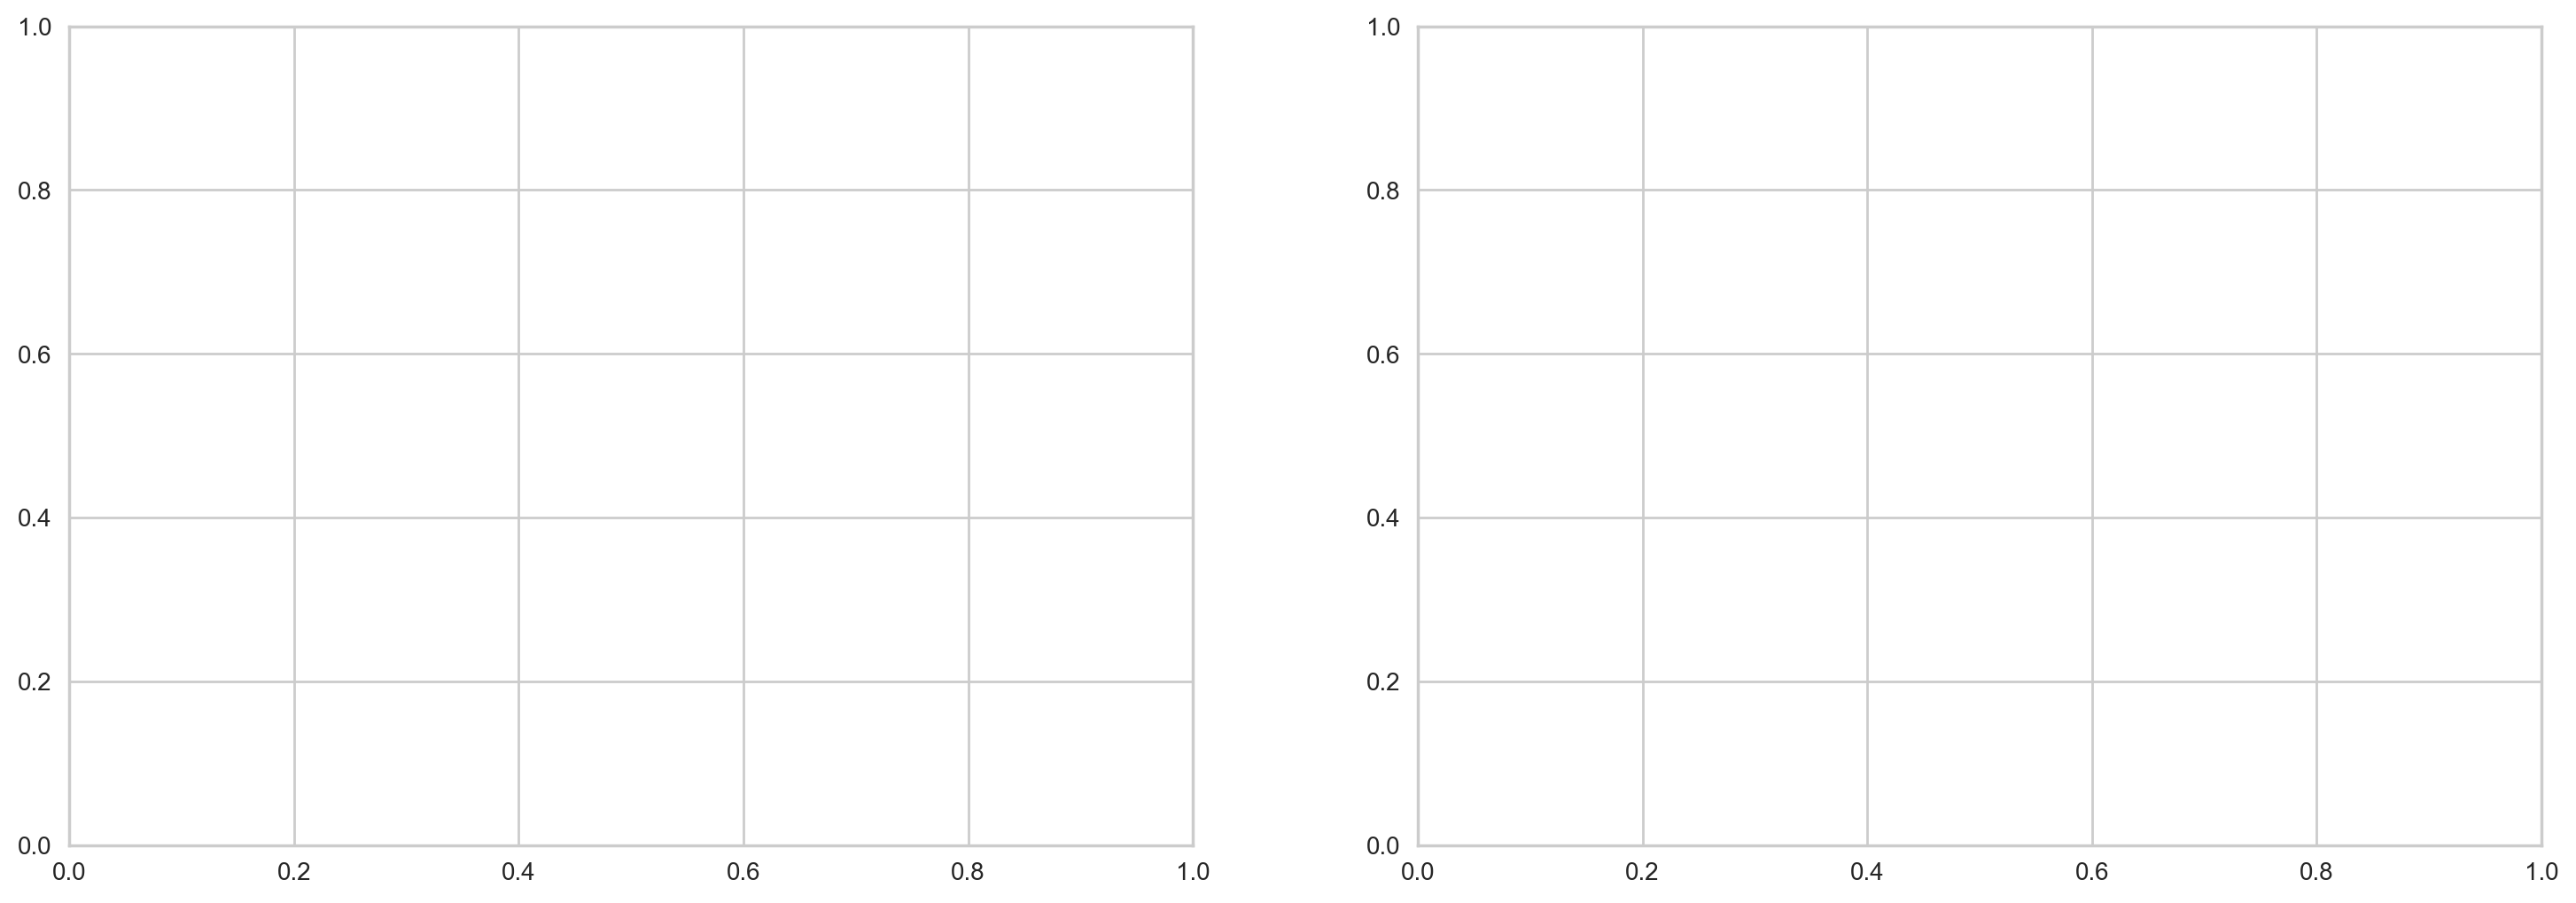

In [96]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']

fig, ax = plt.subplots(ncols = 2, figsize = (18, 6))
ax = ax.ravel()
ax

In [97]:
sns.heatmap(df[cols].groupby('cluster').median(), cmap = "Oranges", linewidths = 1, square = True, annot = True, fmt = '.2f', ax = ax[0]);
sns.heatmap(dx[cols].groupby('cluster').median(), cmap = "Blues", linewidths = 1, square = True, annot = True, fmt = '.2f', ax = ax[1]);

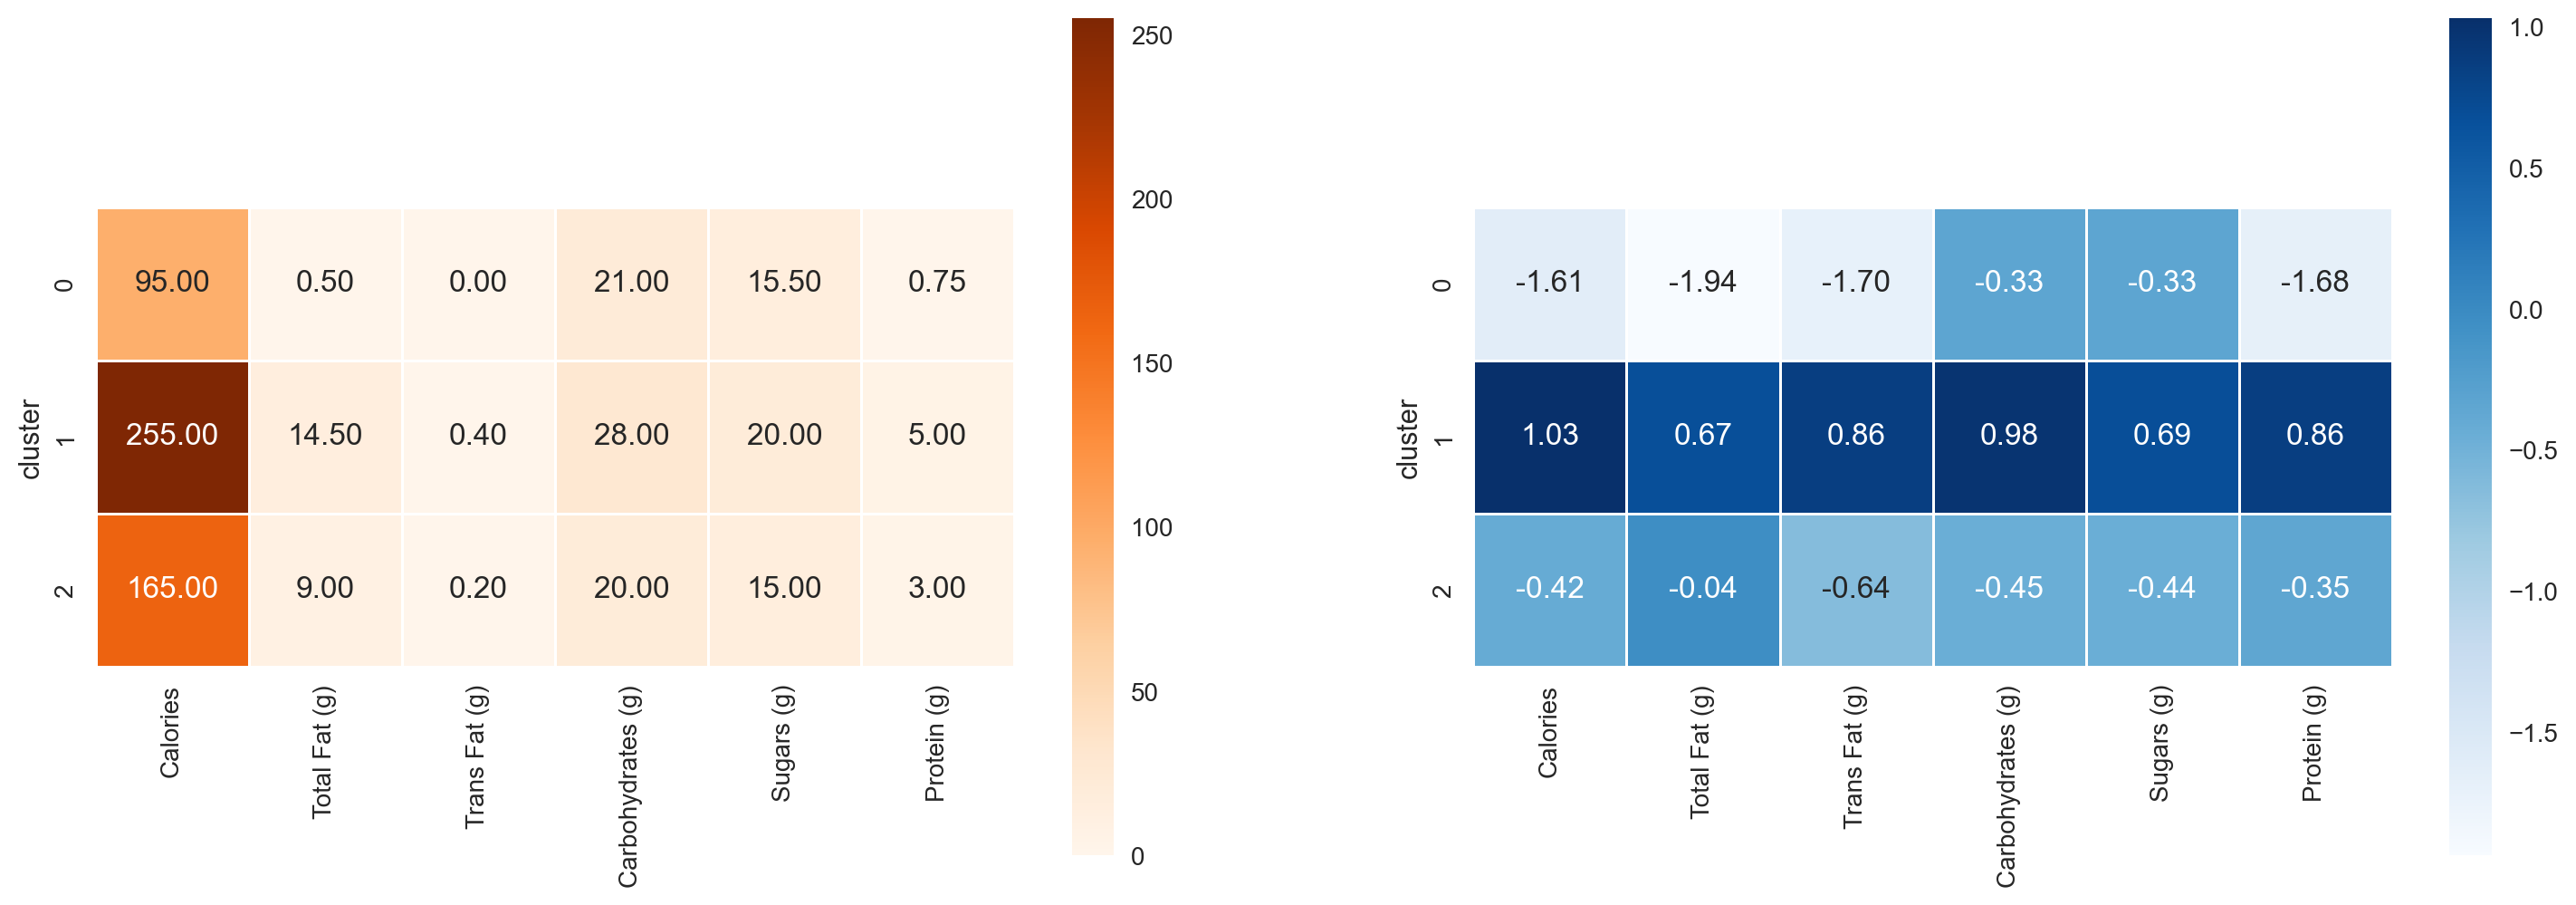

In [98]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster']

fig, ax = plt.subplots(ncols = 2, figsize = (18, 6))
ax = ax.ravel()

sns.heatmap(df[cols].groupby('cluster').median(), cmap = "Oranges", linewidths = 1, square = True, annot = True, fmt = '.2f', ax = ax[0]);
sns.heatmap(dx[cols].groupby('cluster').median(), cmap = "Blues", linewidths = 1, square = True, annot = True, fmt = '.2f', ax = ax[1]);

In [99]:
df.groupby('cluster').head(3).sort_values('cluster')

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,0
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,0
9,Cherries Jubilee,220,11.0,0.4,26,19,4.0,1
11,Chocolate,230,13.0,0.4,25,18,5.0,1
12,Chocolate Chip,240,15.0,0.5,23,18,5.0,1
0,Bananas Foster,160,8.0,0.2,20,16,2.0,2
1,Baseball Nut,160,9.0,0.2,19,13,3.0,2
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,2


In [100]:
df[df.cluster == 0]

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,0
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,0
33,Mango Sorbet,70,0.0,0.0,16,12,0.0,0
50,Rainbow Sherbet,130,2.0,0.1,27,20,1.0,0
58,Splish Splash,70,0.5,0.0,16,12,0.5,0
60,Strawberry Sorbet,70,0.0,0.0,17,13,0.1,0
61,Trio De Janeiro,90,1.5,0.0,17,13,1.0,0
64,NF Vanilla Yogurt,130,0.4,0.0,25,20,6.0,0
66,Watermelon Splash,120,0.5,0.0,27,20,0.1,0
67,Wild ‘n Reckless,80,1.5,0.0,16,12,1.0,0


In [101]:
df.to_csv('BaskinRobbinsCluster.csv', index = False)